In [2]:
import numpy as np
import os 
import pandas as pd
import string
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as pc
import seaborn as sns
import itertools
import matplotlib.cm as cm 
from matplotlib import colors

path = os.getcwd()

plt.rcParams.update({'axes.labelsize': 15, 'axes.titlesize': 15, 
              'legend.fontsize':13, 'font.family': ['sans-serif'] })

res = np.array([1.10978,1.115582,1.160036,1.161309,1.170921,1.172203,1.183206,1.196807,1.209953,1.221539,1.267061,1.280456,1.297376,1.315369,1.354136,1.389147,1.436264,1.466333,1.856226,1.900270,1.904633,1.908044,1.908688,1.924087,1.954064,1.996159,2.016980,2.460095,2.785618,2.962039])


### Frecuencias de resonancia en oscuridad

#### Resonancias

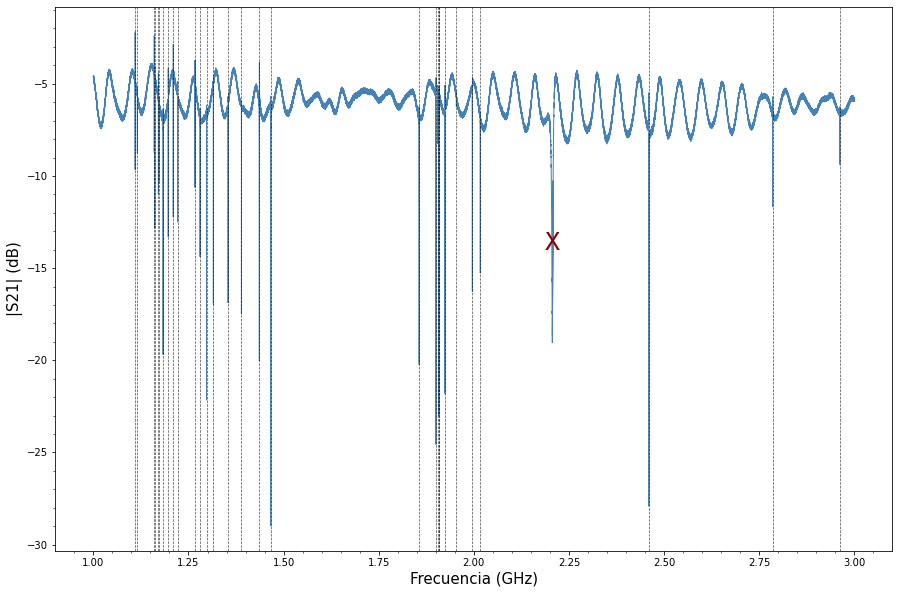

In [2]:
os.chdir(path+'\Datos\MKID')    
os.getcwd()

df = pd.read_csv(path+"/Datos/MKID/Resonators(26.7mk).csv")

freq = ((df.iloc[:,0])/10**9).tolist()
db = df.iloc[:,1].tolist()
phase = df.iloc[:,2].tolist()

fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(freq,db, color='steelblue', alpha=1, linewidth=1)
plt.minorticks_on()  
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('|S21| (dB)')

plt.text(2.1852,-13, 'X', 
         fontsize=25, color='darkred', fontfamily='monospace',
         verticalalignment ='top', horizontalalignment ='left')


[plt.axvline(res[i], color='k', alpha=0.7, linewidth=0.7, linestyle='--') for i in range(len(res))]

plt.show()

### NO

#### Separación entre picos    

Distribución:
- Gráfica general
- Gráfica señalando a qué pares corresponden las barras

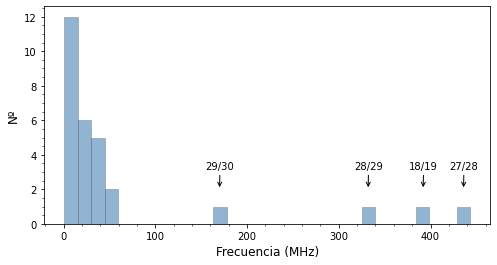

In [25]:
diff = np.delete(np.array([res[i]-res[i-1] for i in range(len(res))]),0)

fig, ax = plt.subplots(figsize=(8, 4))

plt.hist(np.abs(diff)*10**3,30, alpha=0.6, color='steelblue',edgecolor=".3",linewidth=.5,)

# 2
plt.annotate(r'29/30',
            xy=(170, 2), xycoords='data',
            xytext=(-14, 20), textcoords='offset points', fontsize=10,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"))
plt.annotate(r'28/29',
            xy=(332, 2), xycoords='data',
            xytext=(-14, 20), textcoords='offset points', fontsize=10,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"))
plt.annotate(r'18/19',
            xy=(392, 2), xycoords='data',
            xytext=(-14, 20), textcoords='offset points', fontsize=10,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"))
plt.annotate(r'27/28',
            xy=(436, 2), xycoords='data',
            xytext=(-14, 20), textcoords='offset points', fontsize=10,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"))



plt.minorticks_on()  
plt.xlabel('Frecuencia (MHz)', size=12)
plt.ylabel('Nº', size=12)
plt.show()


Tres pares de picos más juntos

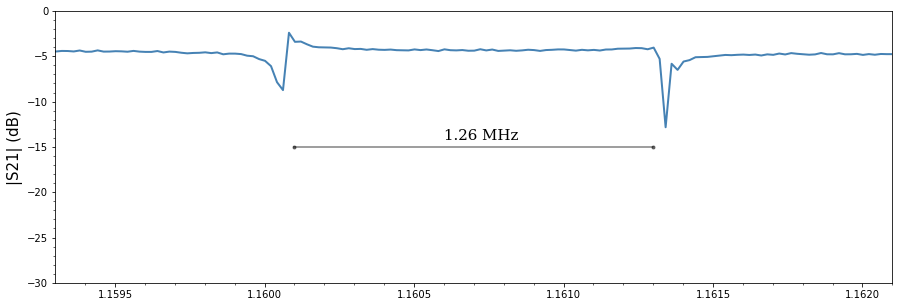

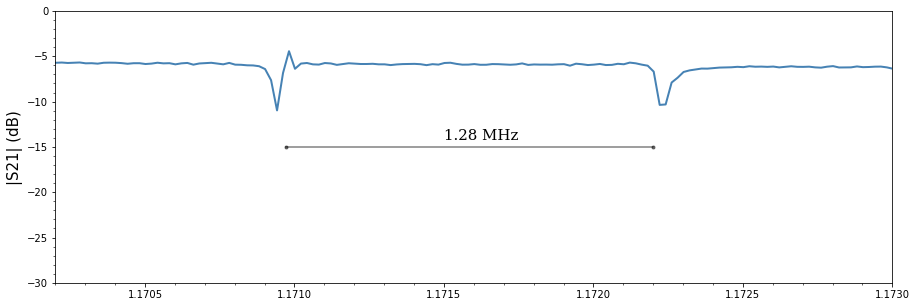

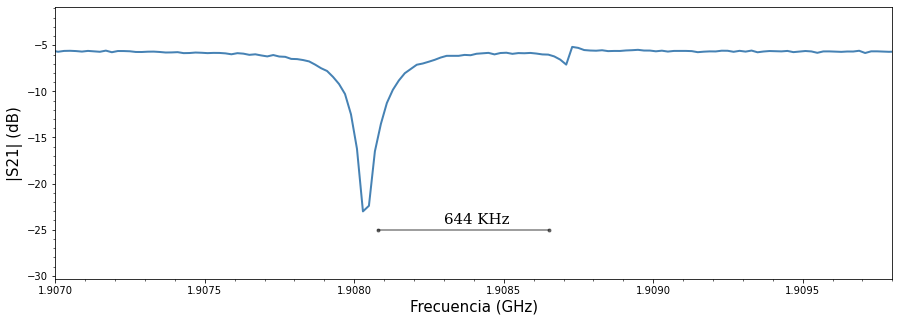

In [3]:
# 3 y 4
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(freq,db, color='steelblue', alpha=1, linewidth=2)
plt.minorticks_on()  
plt.ylabel('|S21| (dB)')

plt.plot((1.1601,1.1613),(-15,-15), '.-',c='k',alpha=0.5 )
plt.text(1.1606,-13, '1.26 MHz', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.xlim(1.1593, 1.1621)
plt.ylim(-30,0)
plt.show()


# 5 y 6
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(freq,db, color='steelblue', alpha=1, linewidth=2)
plt.minorticks_on()  
plt.ylabel('|S21| (dB)')

plt.plot((1.17097,1.1722),(-15,-15), '.-',c='k',alpha=0.5 )
plt.text(1.1715,-13, '1.28 MHz', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.xlim(1.1702, 1.173)
plt.ylim(-30,0)
plt.show()

# 22 y 23
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(freq,db, color='steelblue', alpha=1, linewidth=2)
plt.minorticks_on()  
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('|S21| (dB)')

plt.plot((1.90808,1.90865),(-25,-25), '.-',c='k',alpha=0.5 )
plt.text(1.9083,-23.2, '644 KHz', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.xlim(1.9070, 1.9098)
plt.show()

### Dependencia con la potencia

Variación de potencia de 70 dBm a 50 dBm:
- Gráfico general (modo gif?)
- Gráfico de la resonancia 28 (puntualizando donde pierde la forma)
- Gráfico de la resonancia 18 para hacer ver que se satura a distintas atenuaciones cada pico

En esta celda hago las imagenes para el gif general

Pot50.csv


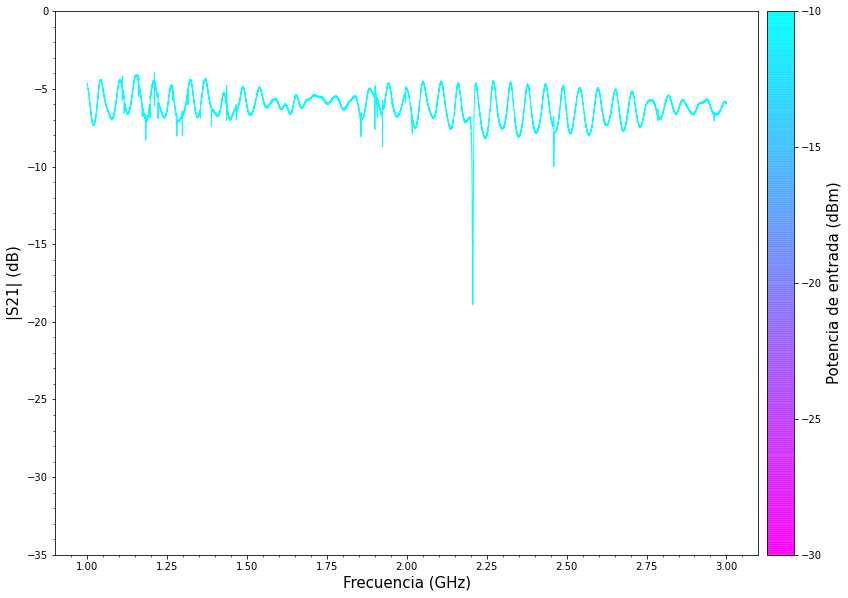

Pot51.csv


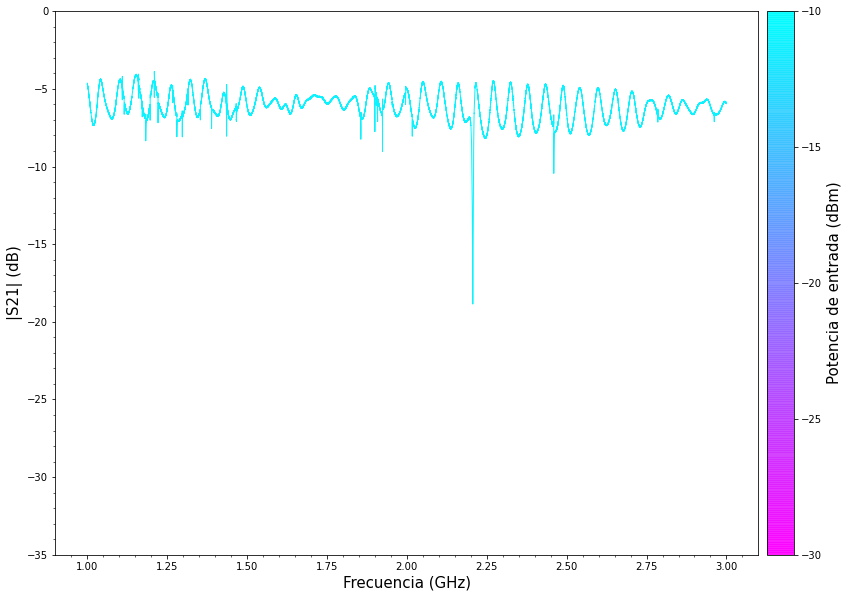

Pot52.csv


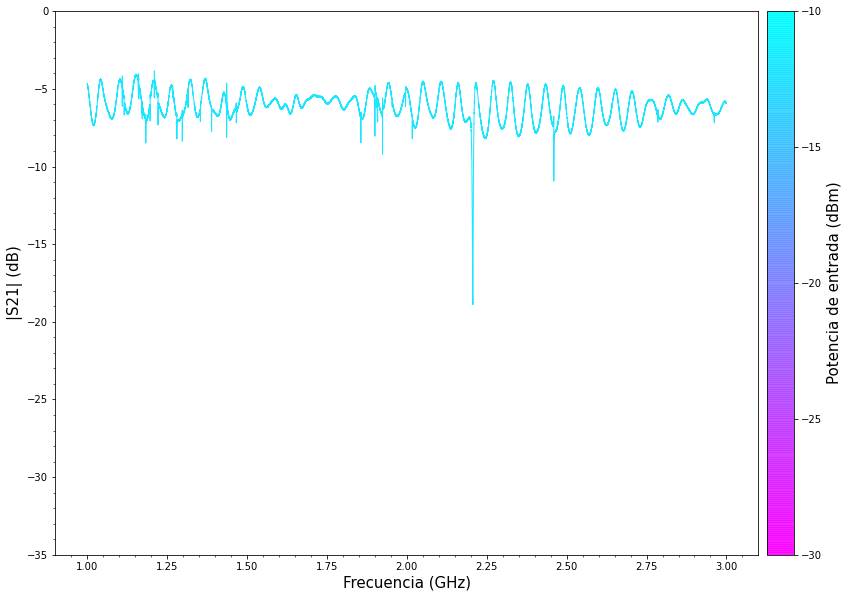

Pot53.csv


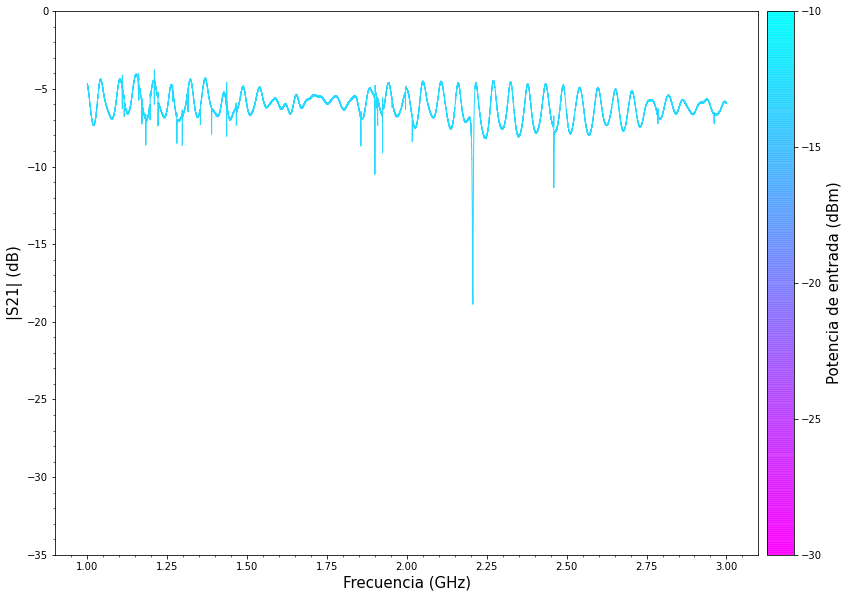

Pot54.csv


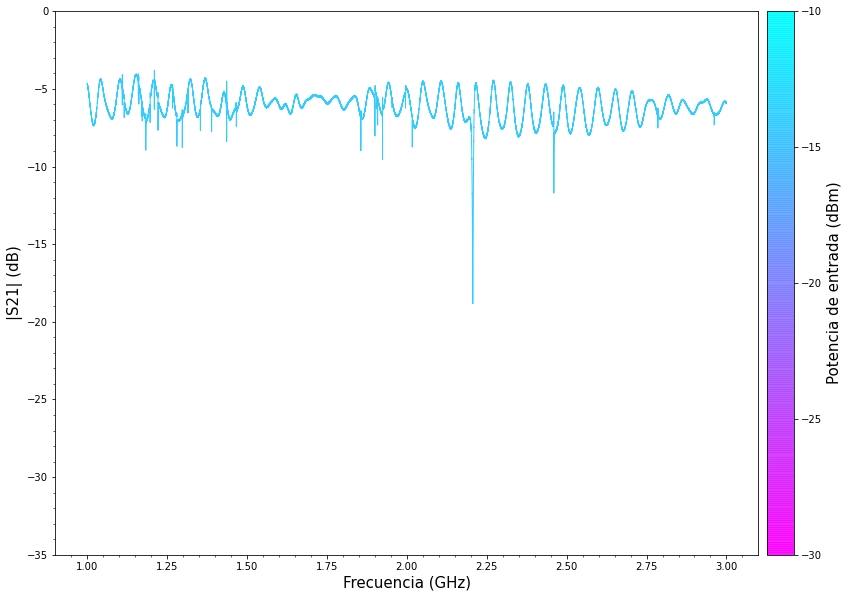

Pot55.csv


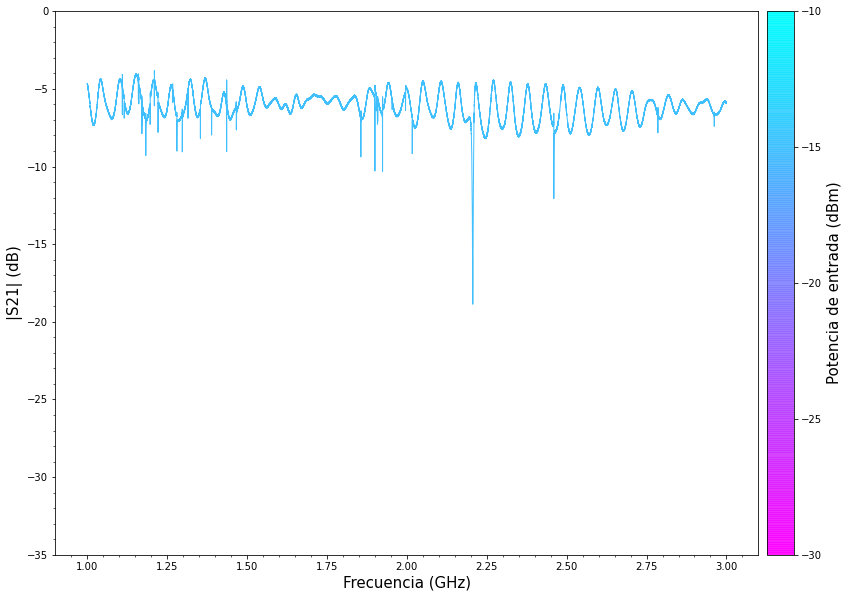

Pot56.csv


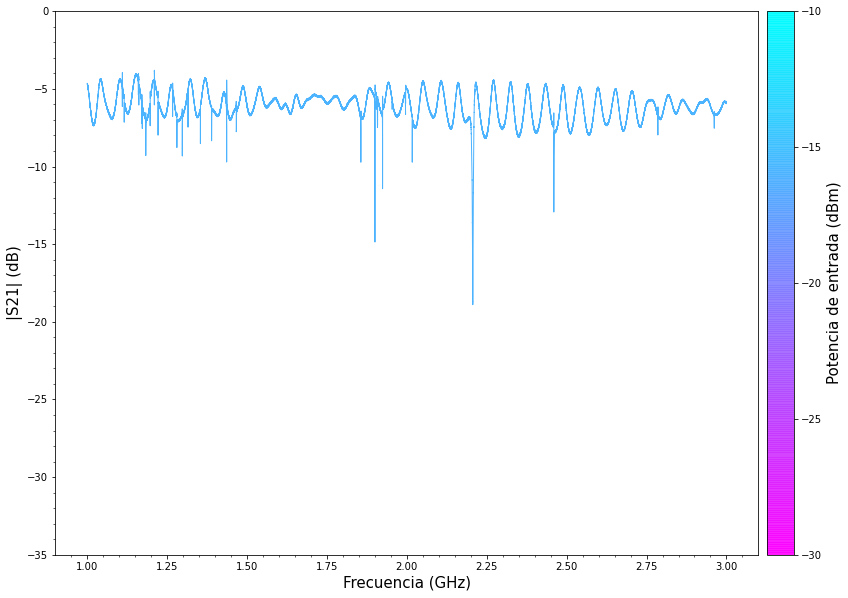

Pot57.csv


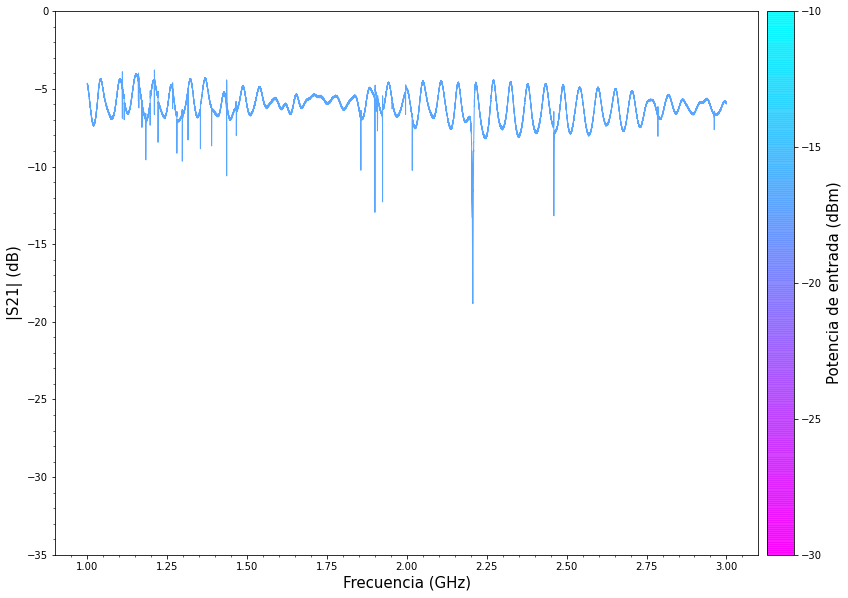

Pot58.csv


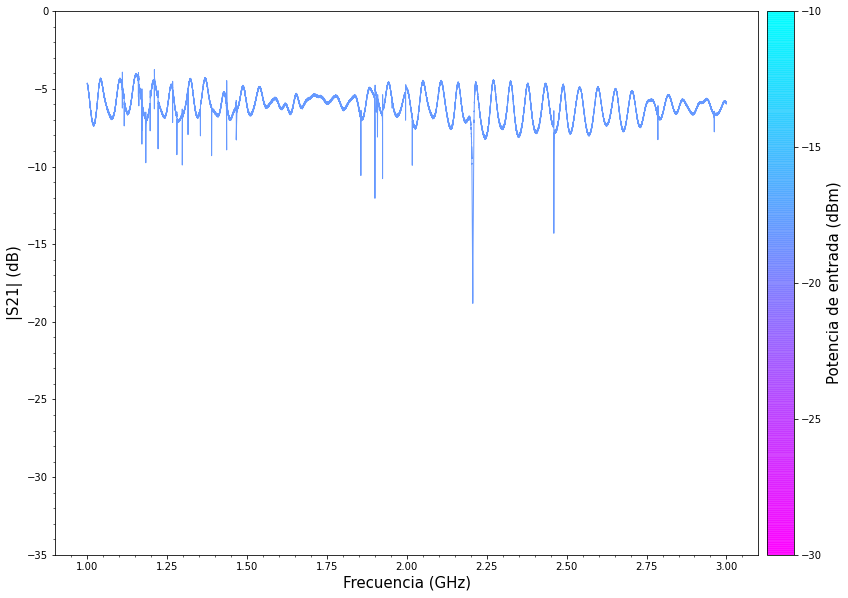

Pot59.csv


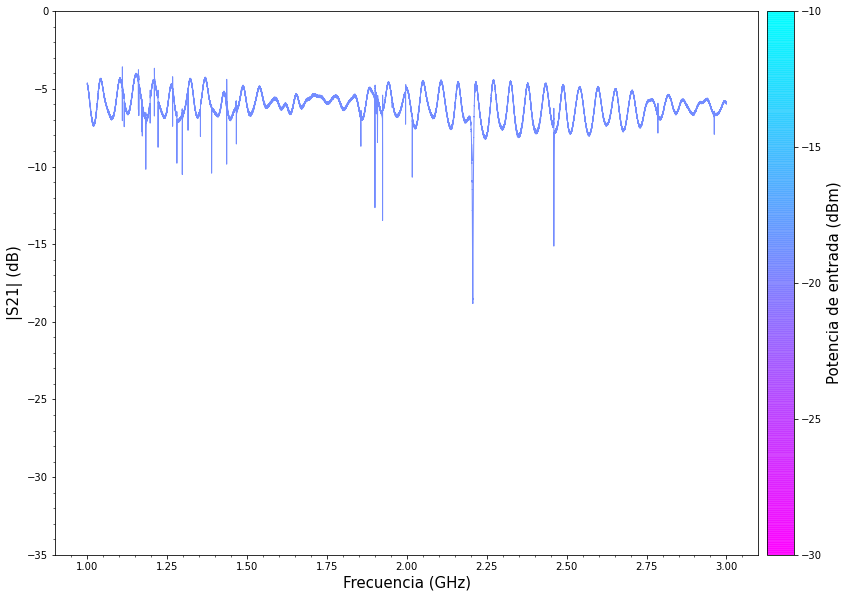

Pot60.csv


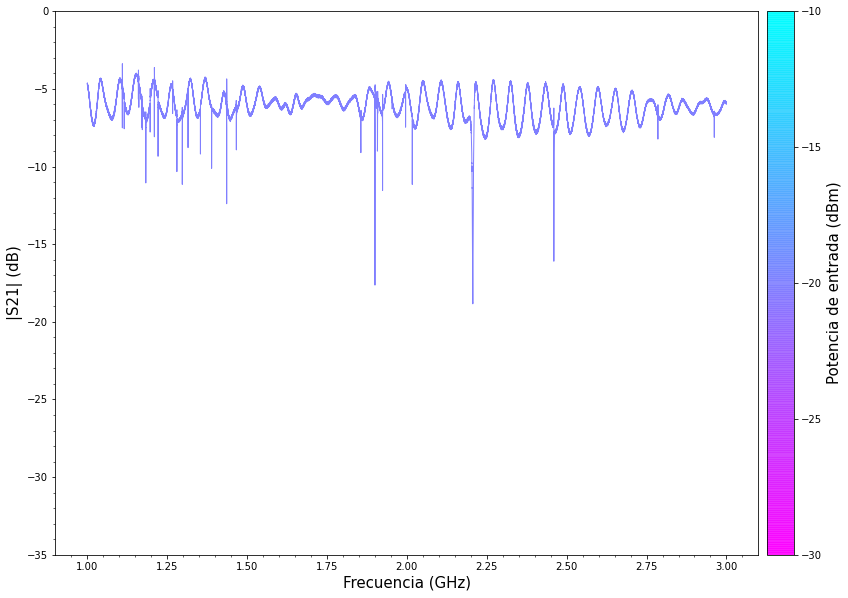

Pot61.csv


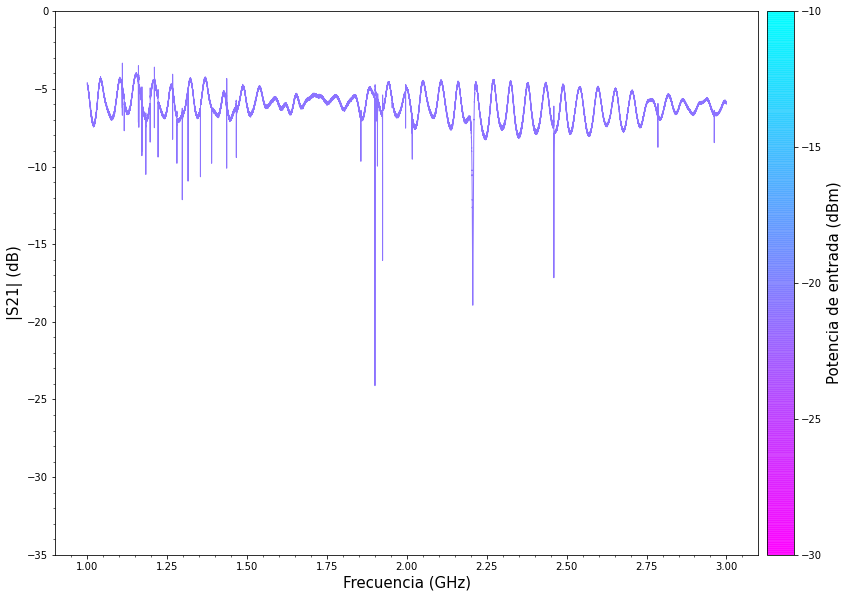

Pot62.csv


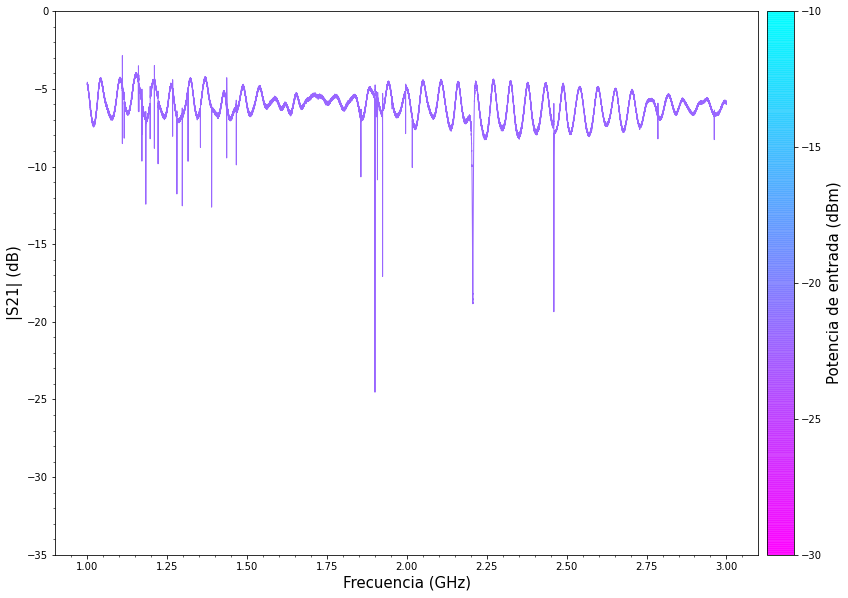

Pot63.csv


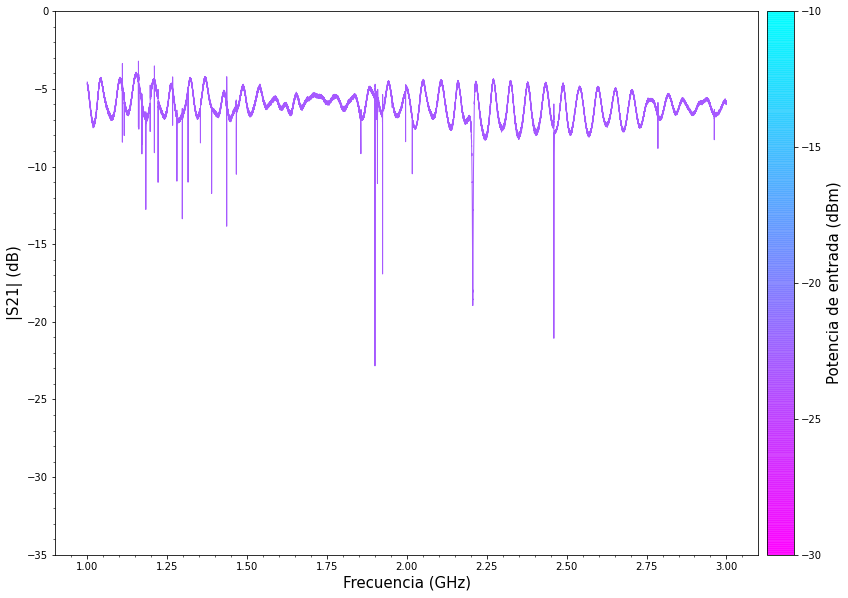

Pot64.csv


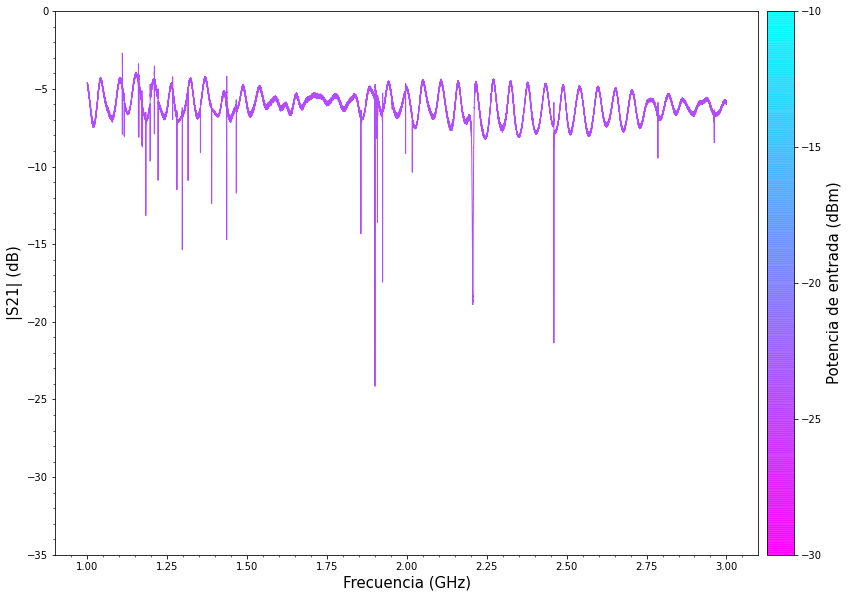

Pot65.csv


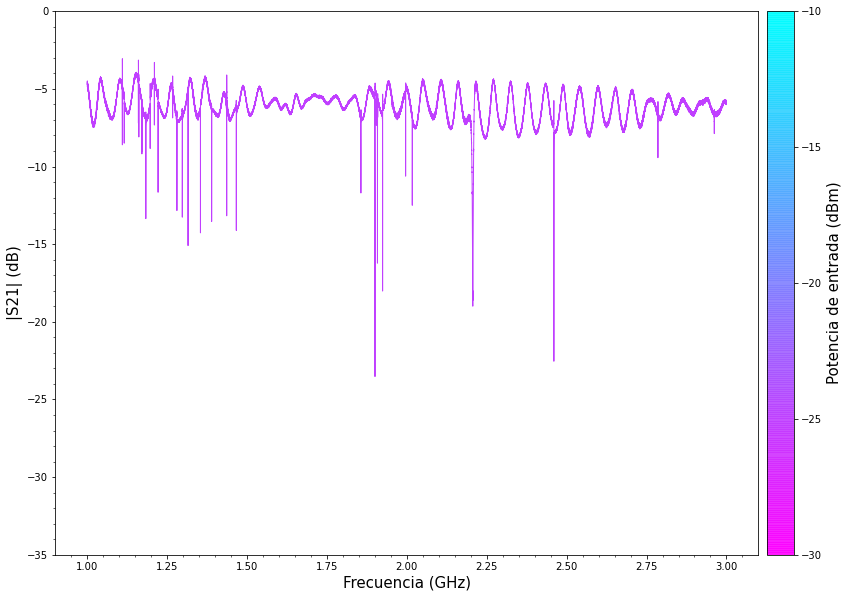

Pot66.csv


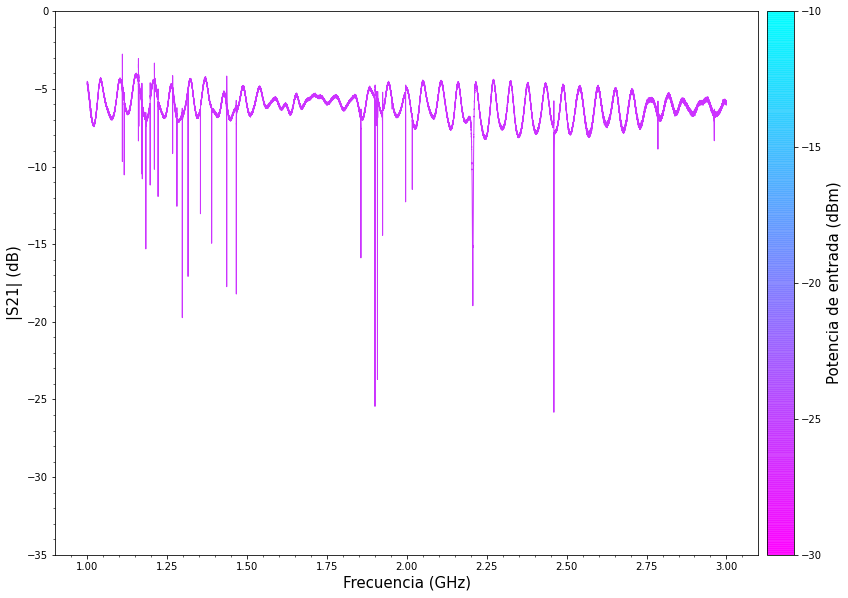

Pot67.csv


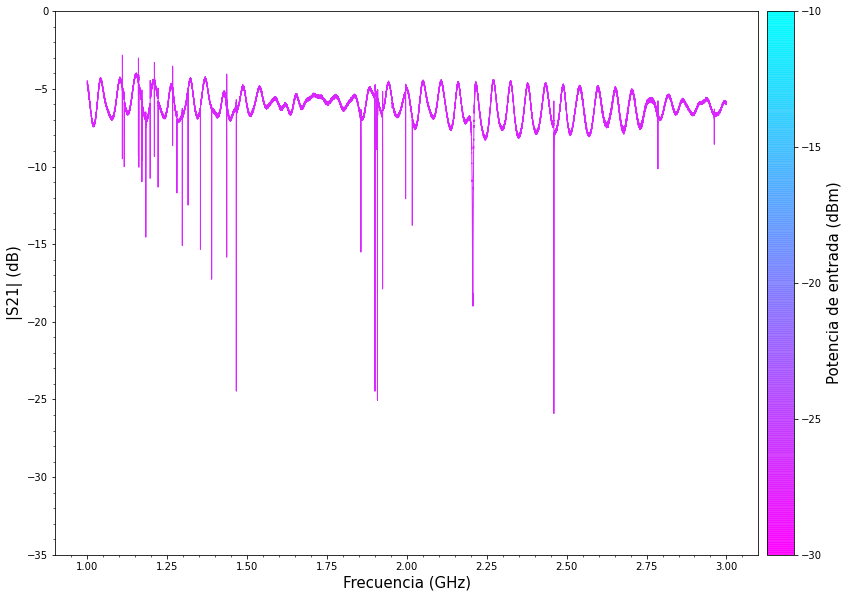

Pot68.csv


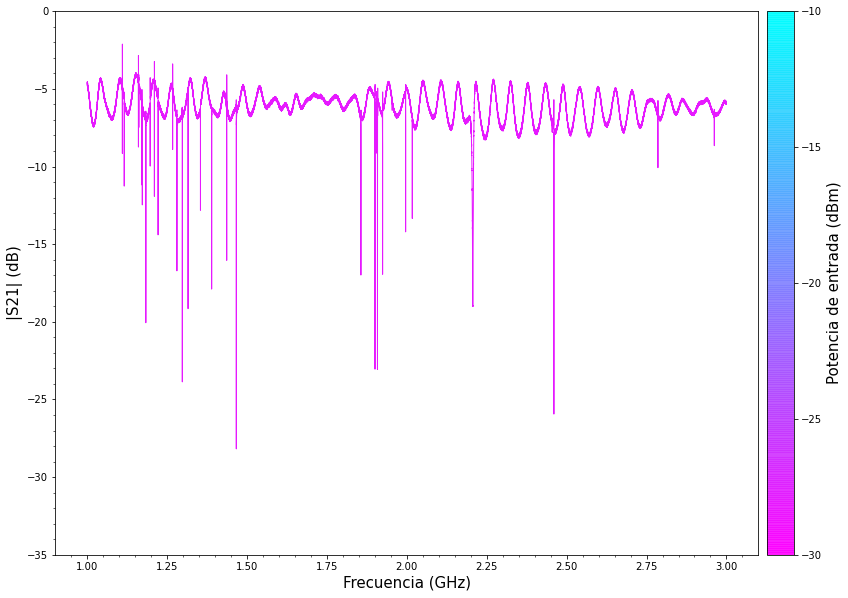

Pot69.csv


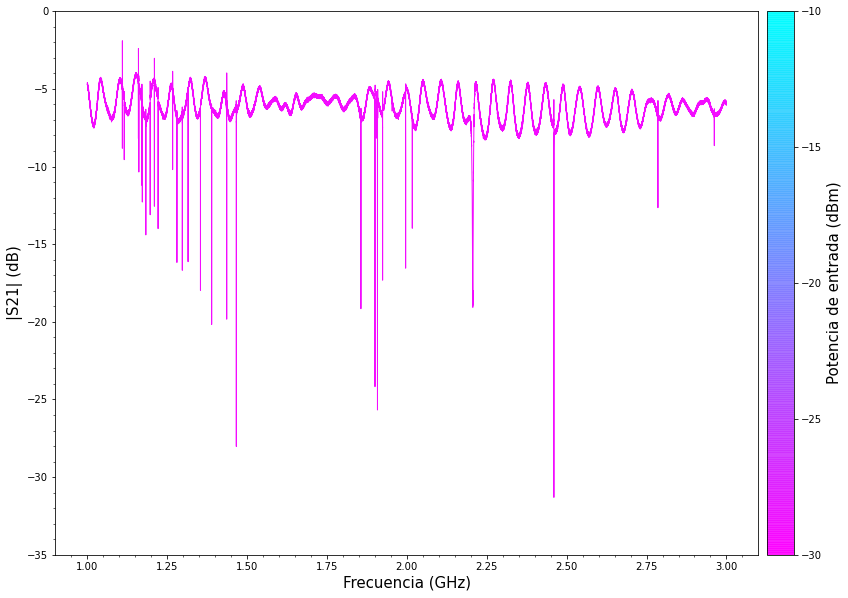

Pot70.csv


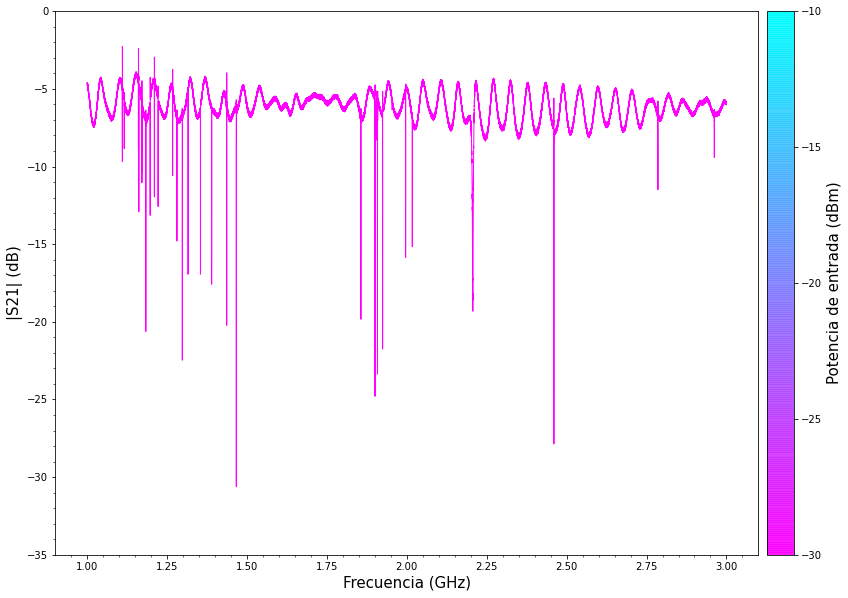

In [52]:
os.chdir(path+'\Datos\MKID\Potencia')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Potencia","*.csv")

norm = np.linspace(0,1,21)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("cool")
colores = colormap(normdata(norm))

for i in range(len(files)):
    print(files[i])
    fig, ax = plt.subplots(figsize=(15, 10))
    file = files[i]
    df_file = pd.read_csv(file)
    freq = ((df_file.iloc[:,0])/10**9).tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()
    plt.plot(freq,db, alpha=1, linewidth=1, color=colores[i])

    x =np.arange(-30,-9,1)
    plt.scatter(x,x-70, alpha=0.9, s=0, c=range(-30,-9), cmap='cool_r') 
    plt.colorbar(label='Potencia de entrada (dBm)',ticks=np.linspace(-30, -10, 5), pad=0.01) 
    plt.xlim(0.9, 3.1)
    
    plt.minorticks_on()  
    plt.xlabel('Frecuencia (GHz)')
    plt.ylabel('|S21| (dB)')
    plt.ylim(-35,0)
    plt.show()

Resonancia 28

(2.459, 2.461)

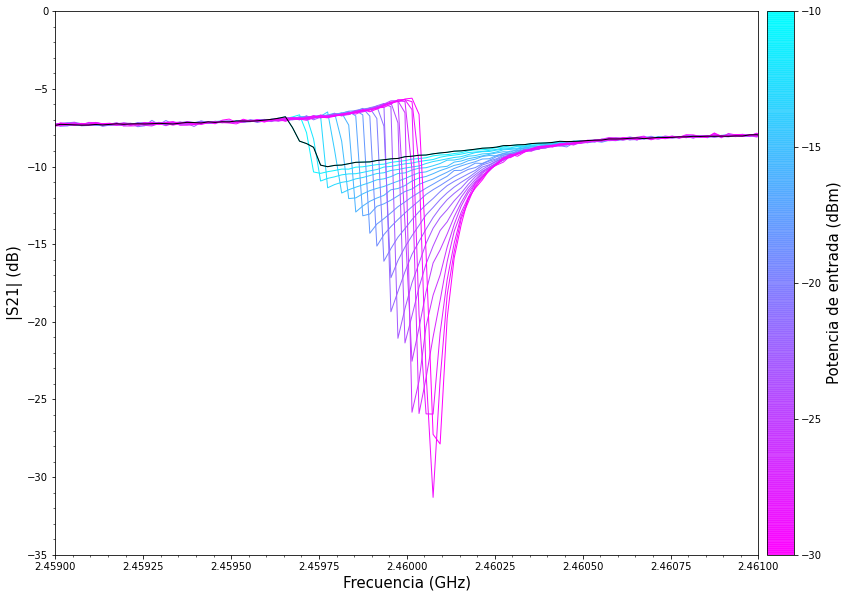

In [54]:
os.chdir(path+'\Datos\MKID\Potencia')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Potencia","*.csv")

norm = np.linspace(0,1,21)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("cool")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(files)):
    file = files[i]
    df_file = pd.read_csv(file)
    freq = ((df_file.iloc[:,0])/10**9).tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()

    plt.plot(freq,db, alpha=1, linewidth=1,  color=colores[i])

df_file = pd.read_csv(files[0]) 
freq = freq = ((df_file.iloc[:,0])/10**9).tolist()
db = df_file.iloc[:,1].tolist()
plt.plot(freq,db, alpha=1, linewidth=1, color='k')

x =np.arange(-30,-9,1)
plt.scatter(x,x-70, alpha=0.9, s=0, c=range(-30,-9), cmap='cool_r') 
plt.colorbar(label='Potencia de entrada (dBm)',ticks=np.linspace(-30, -10, 5), pad=0.01) 
plt.ylim(-35,0)

plt.minorticks_on()  
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('|S21| (dB)')
plt.xlim(2.459, 2.461)


Resonancia 18

(1.4656, 1.4671)

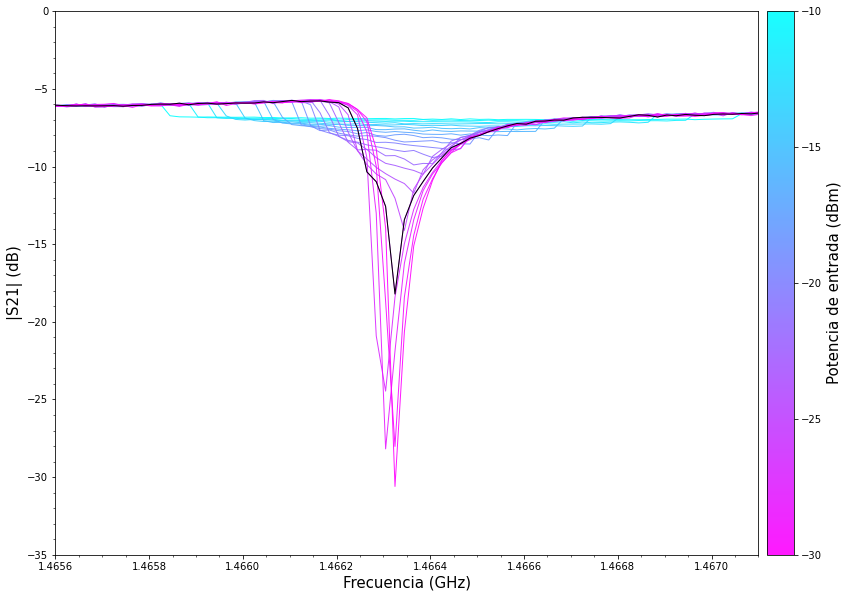

In [5]:
os.chdir(path+'\Datos\MKID\Potencia')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Potencia","*.csv")

norm = np.linspace(0,1,21)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("cool")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(files)):
    file = files[i]
    df_file = pd.read_csv(file)
    freq = ((df_file.iloc[:,0])/10**9).tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()

    plt.plot(freq,db, alpha=0.9, linewidth=1, color=colores[i])
    
df_file = pd.read_csv(files[16]) 
freq = freq = ((df_file.iloc[:,0])/10**9).tolist()
db = df_file.iloc[:,1].tolist()
plt.plot(freq,db, alpha=1, linewidth=1, color='k')

x =np.arange(-30,-9,1)
plt.scatter(x,x-70, alpha=0.9, s=0, c=range(-30,-9), cmap='cool_r') 
plt.colorbar(label='Potencia de entrada (dBm)',ticks=np.linspace(-30, -10, 5), pad=0.01) 
plt.ylim(-35,0)
    
plt.minorticks_on()  
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('|S21| (dB)')   
plt.xlim(1.4656,1.4671)
#plt.xlim(1.904,1.9053) #21

Variación de potencia de 70 dBm a 100 dBm:
- Gráfico general (modo gif?)
- ¿Gráfico de la resonancia 28 (puntualizando el tema del ruido)?

En realidad aquí creo que podría poner solo la general, se ve bastante claramente. O si acaso poner un pico pequeño para mostrar que se pierde mucho en el ruido.

Text(0, 0.5, '|S21| (dB)')

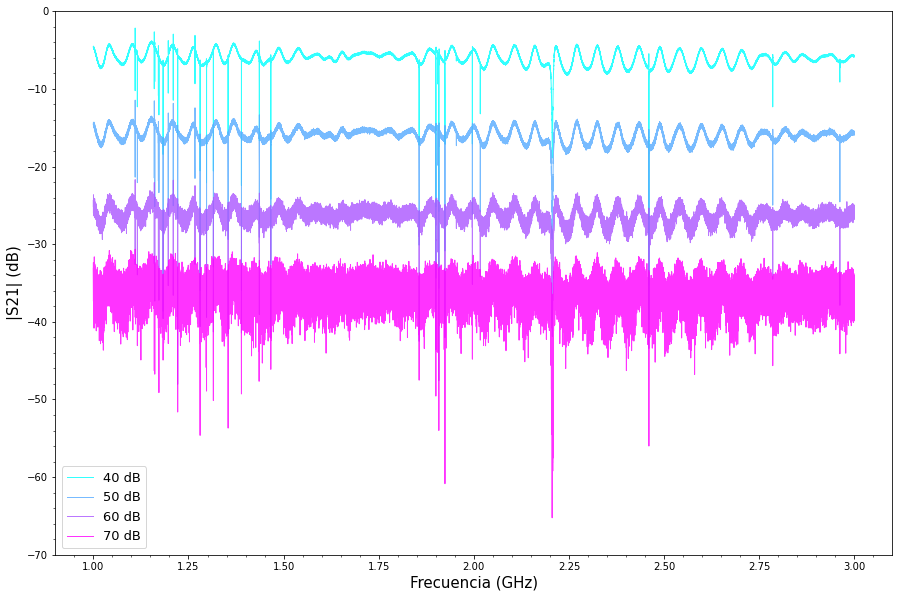

In [11]:
os.chdir(path+'\Datos\MKID\Potencia\señal-ruido')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Potencia\señal-ruido","*.csv")
power = ['40 dB', '50 dB', '60 dB', '70 dB']

norm = np.linspace(0,1,4)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("cool")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(files)):
    file = files[i]
    df_file = pd.read_csv(file)
    freq = ((df_file.iloc[:,0])/10**9).tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()

    plt.plot(freq,db, alpha=0.8, linewidth=1, label=power[i], color=colores[i])
    
plt.ylim(-70,0)
plt.legend() 
plt.minorticks_on()  
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('|S21| (dB)')



No puedo hacer el gráfico de todas las potencias porque en el caso de cuando subo la atenuación se baja la gráfica, y aunque la recolocara tendría tanto ruido qu eno se apreciaría nada

Resonancia 21, para mostrar que los picos pequeños se pierden en el reuido

(1.904, 1.9053)

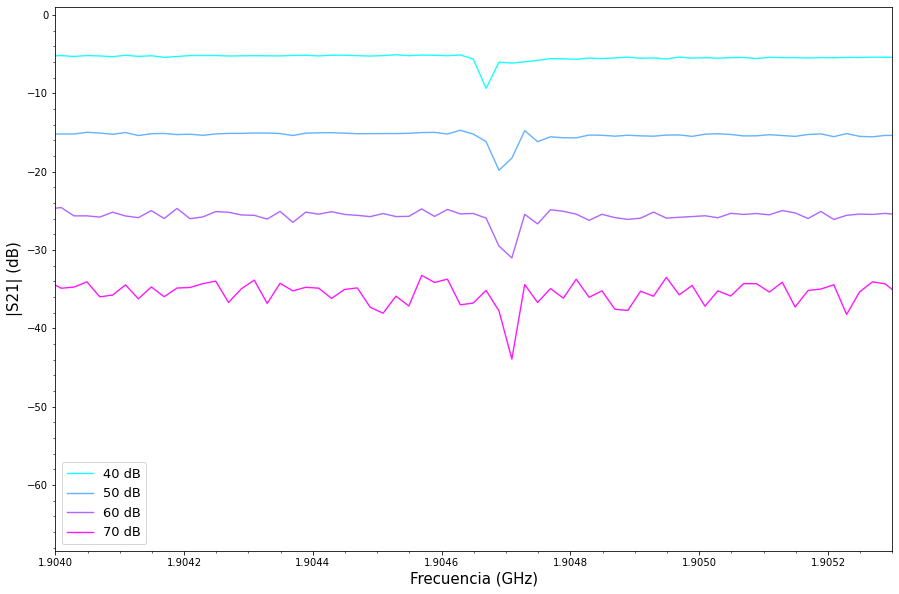

In [8]:
os.chdir(path+'\Datos\MKID\Potencia\señal-ruido')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Potencia\señal-ruido","*.csv")
power = ['40 dB', '50 dB', '60 dB', '70 dB']

norm = np.linspace(0,1,4)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("cool")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(files)):
    file = files[i]
    df_file = pd.read_csv(file)
    freq = ((df_file.iloc[:,0])/10**9).tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()

    plt.plot(freq,db, alpha=0.9, linewidth=1.4, label=power[i], color=colores[i])
    
plt.legend() 
plt.minorticks_on()  
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('|S21| (dB)') 
plt.xlim(1.904,1.9053)
#plt.ylim(-50,0)

### Dependencia con la temperatura

Variación de la temperatura general (no haría falta la de menos de 200 mK, no aporta nada porque no cambia, lo suyo es que vaya directa a lo del día 24):
- Gráfico general (modo gif)
- Gráfico de la resonancia 28, haciendo el zoom (dos gráficas vaya) y sin tener en cuenta la temp 350 mK

Gráfico general para temp menores de 200 mK  ->  no cambia

(2.459, 2.461)

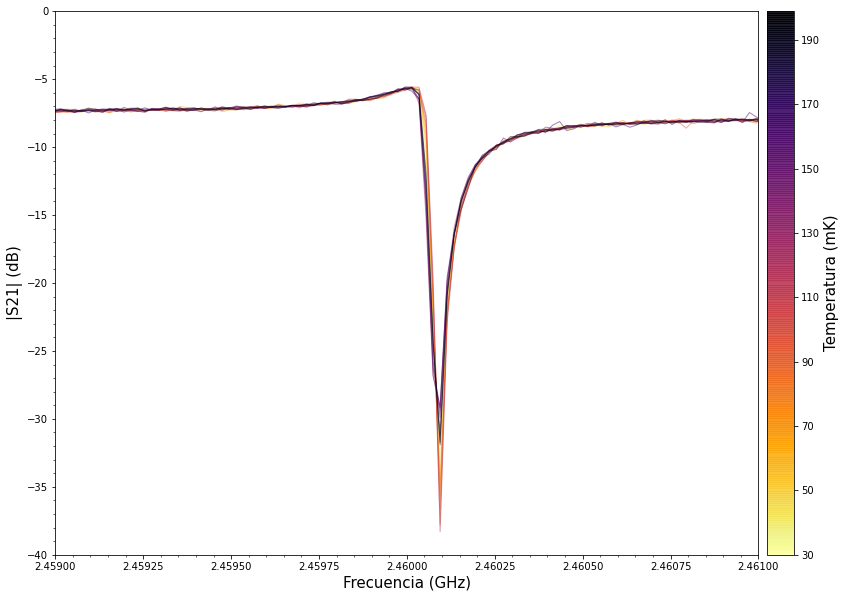

In [22]:
os.chdir(path+'\Datos\MKID\Temperatura\\23')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Temperatura\\23","*.csv")

norm = np.linspace(0,1,15)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("inferno_r")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(files)):
    file = files[i]
    df_file = pd.read_csv(file)
    freq = ((df_file.iloc[:,0])/10**9).tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()

    plt.plot(freq,db, alpha=0.5, linewidth=1, label=files[i], color=colores[i])

x =np.arange(30,200,1)
plt.scatter(x,x, alpha=0.9, s=0, c=range(30,200), cmap='inferno_r') 
plt.colorbar(label='Temperatura (mK)',ticks=np.linspace(30, 210, 10), pad=0.01) 
plt.ylim(-40,0) 

plt.minorticks_on()  
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('|S21| (dB)') 

plt.xlim(0.9, 3.1)   # 28
plt.xlim(2.459, 2.461)

El primer gráfico no lo cojo, que lo he metido ahí para no tener el primero tan clarito

- - 1700 mk - copia.csv


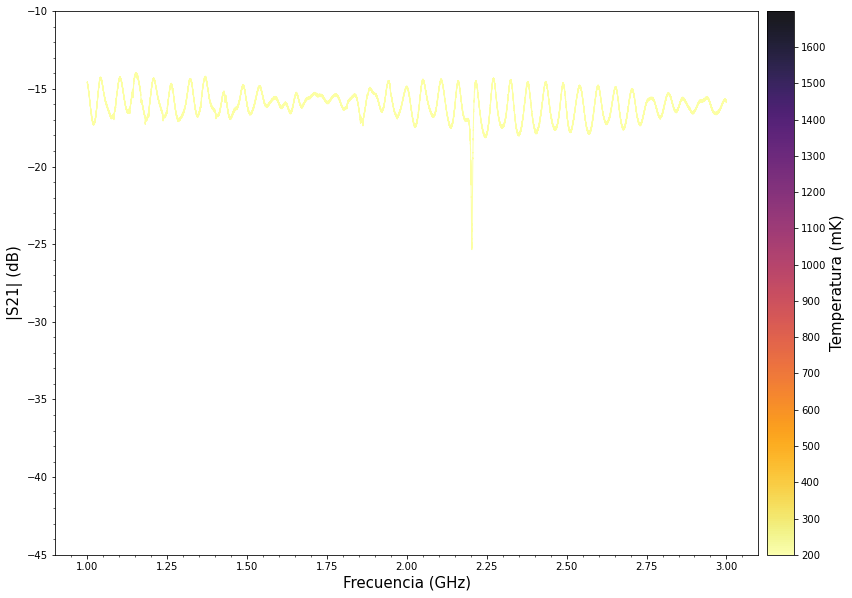

-200 mk+.csv


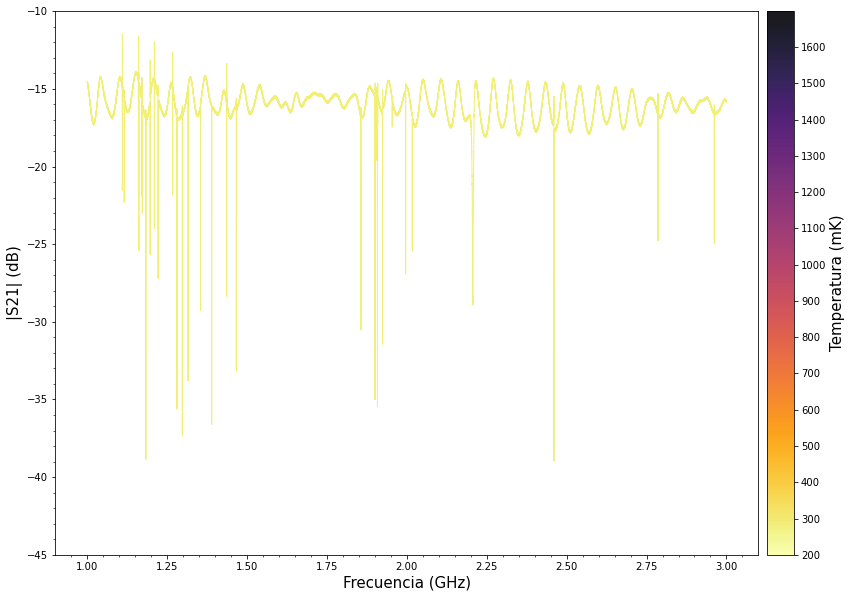

-250 mk.csv


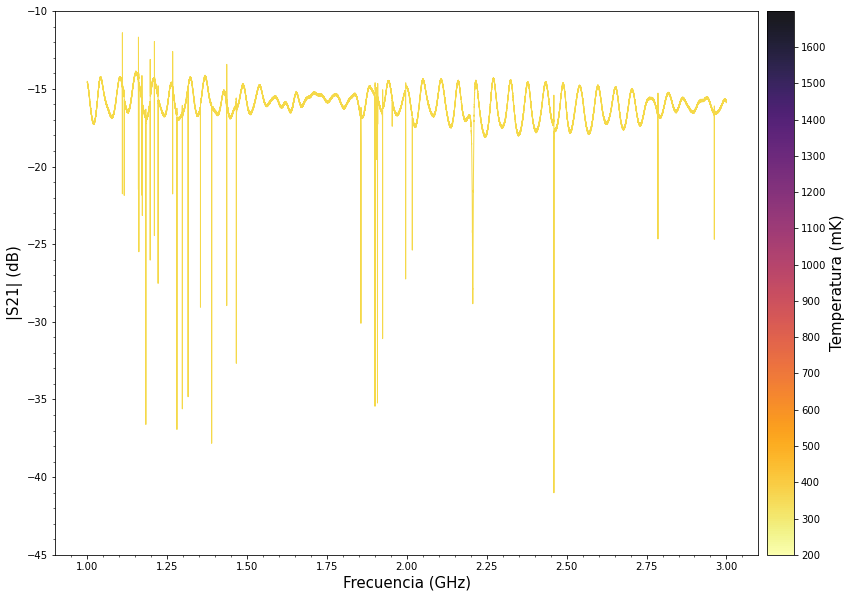

-300 mk.csv


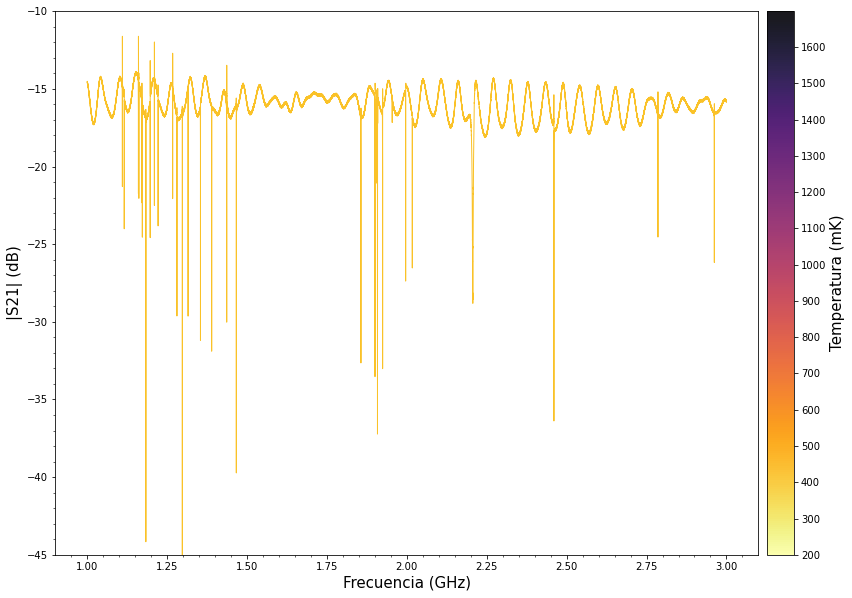

-500 mk.csv


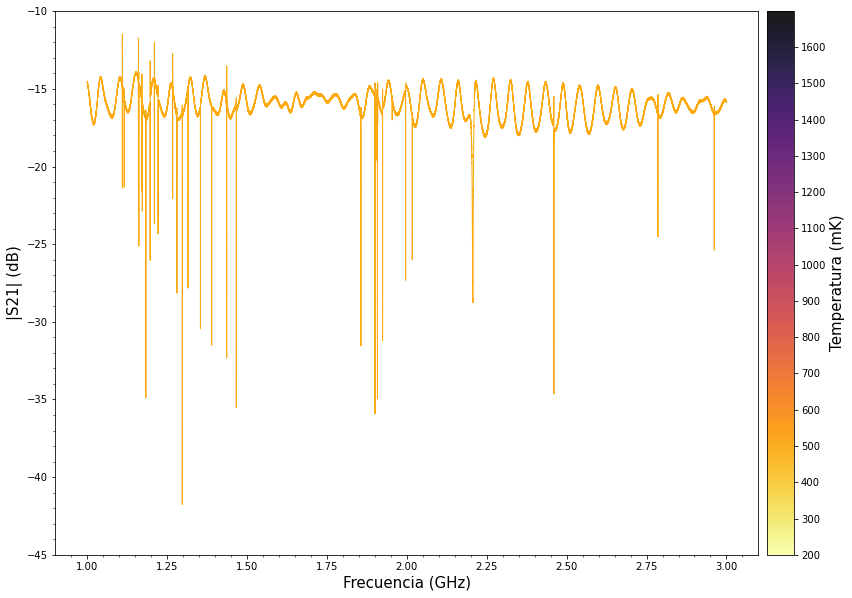

-550 mk.csv


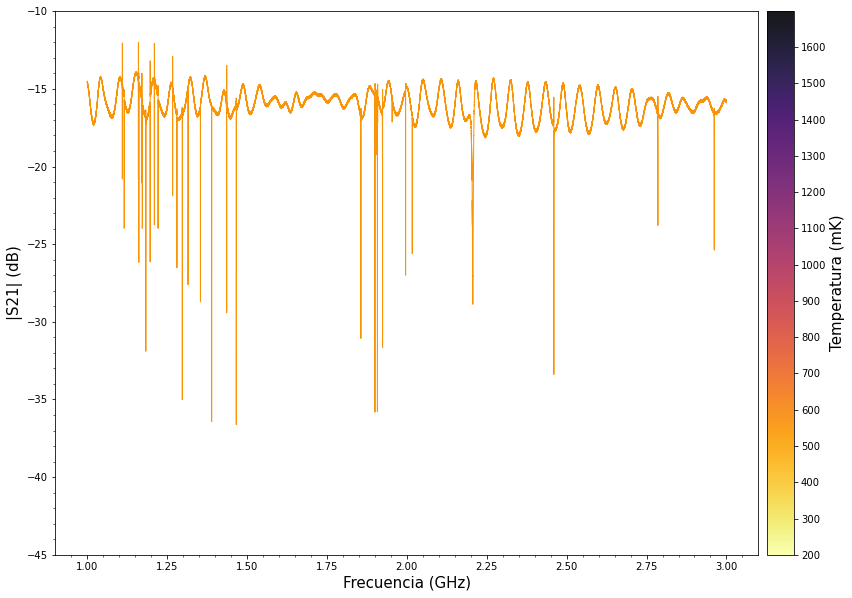

-600 mk.csv


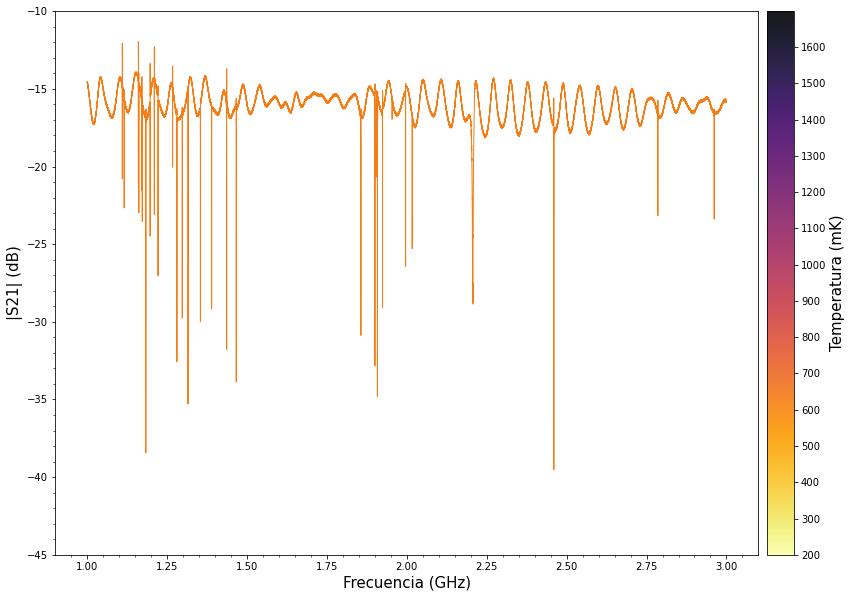

-650 mk.csv


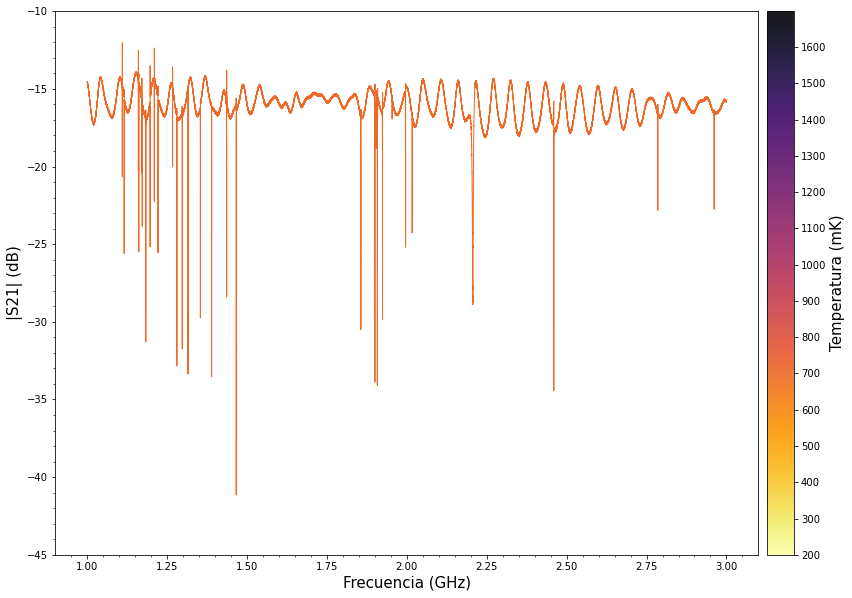

-700 mk.csv


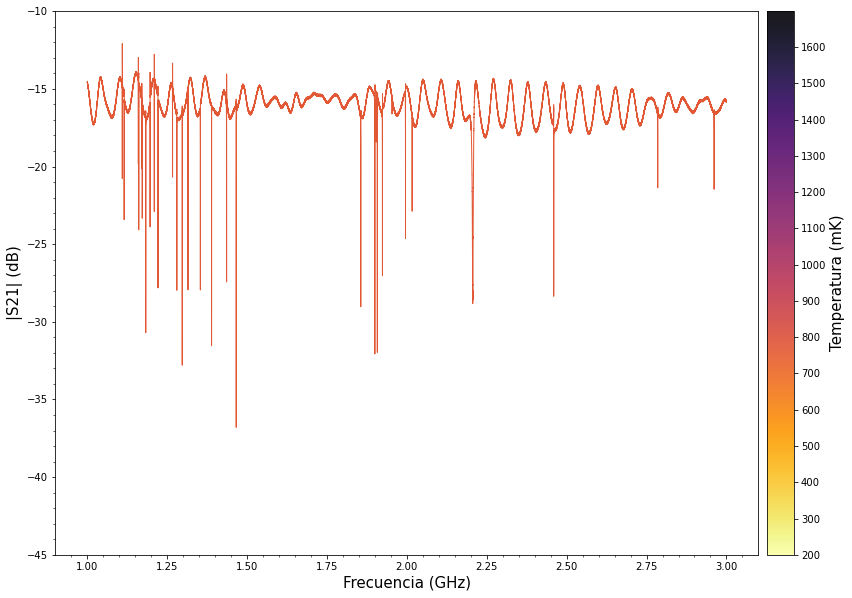

-750 mk.csv


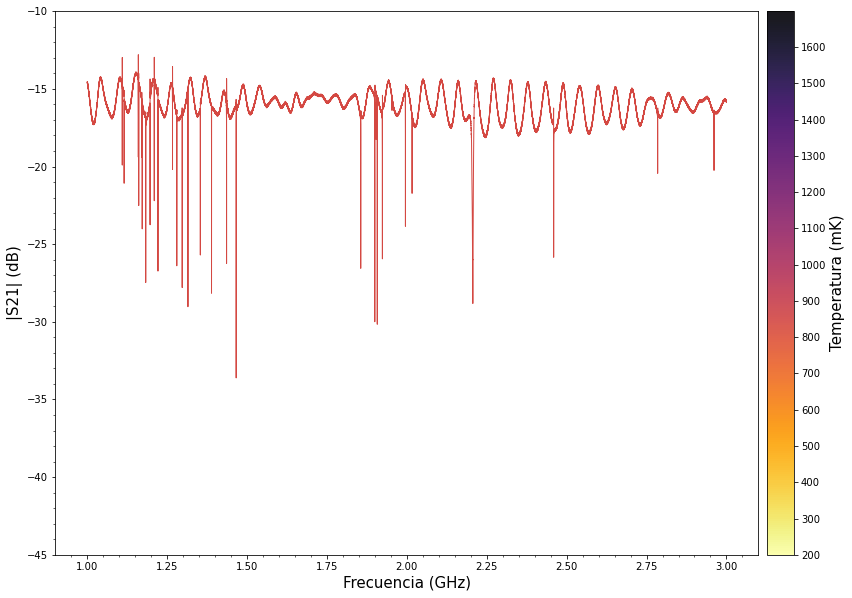

-800 mk.csv


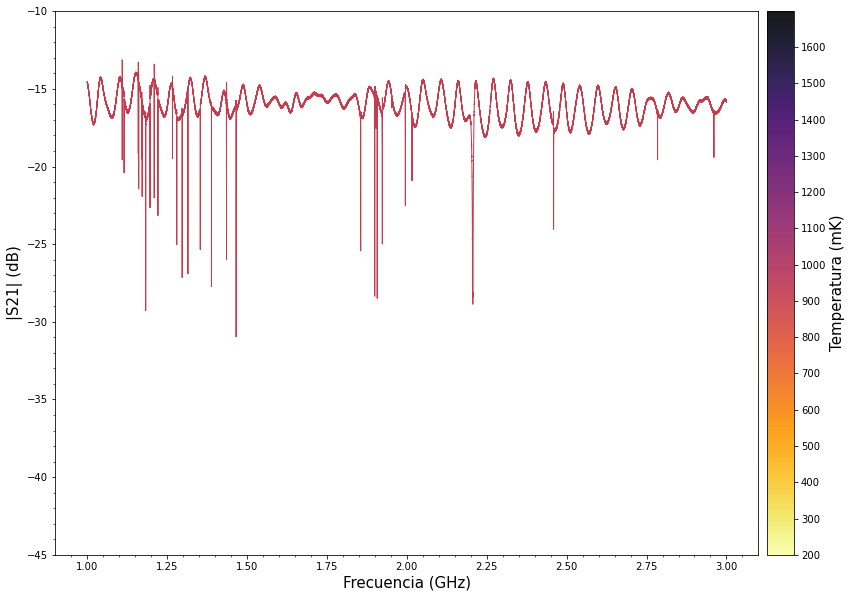

-850 mk.csv


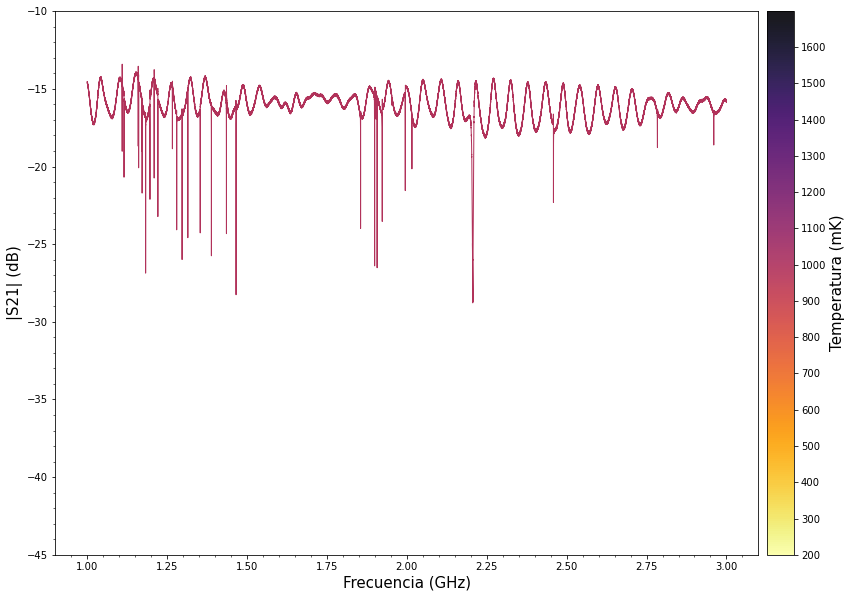

-900 mk.csv


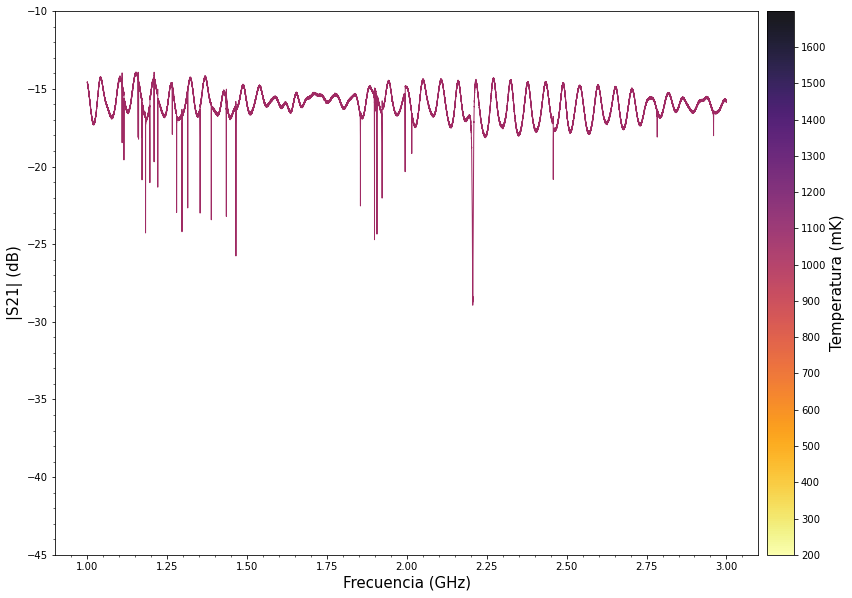

-950 mk.csv


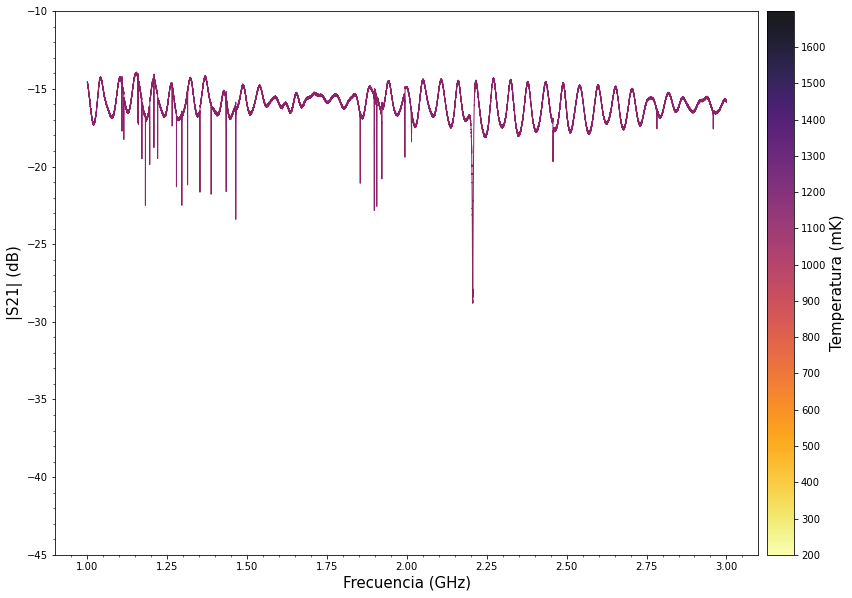

1000 mk.csv


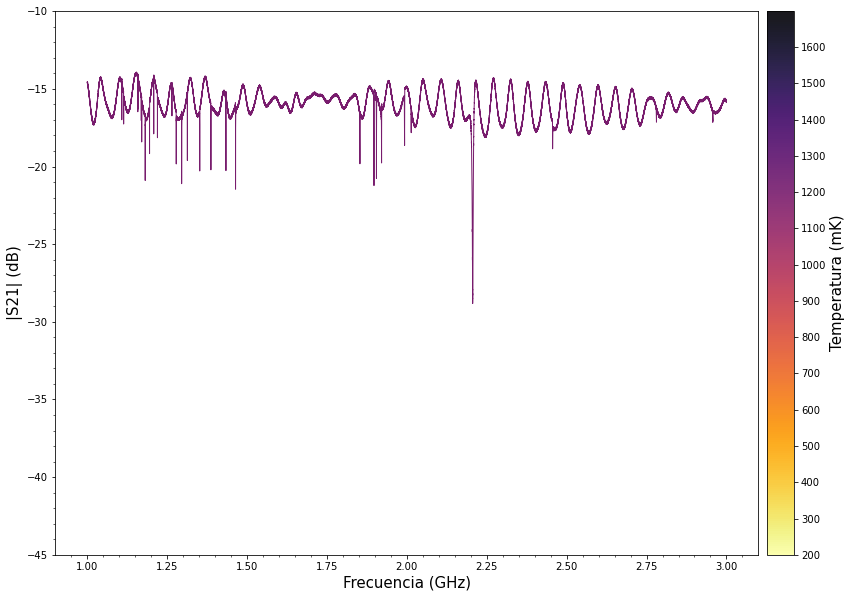

1100 mk.csv


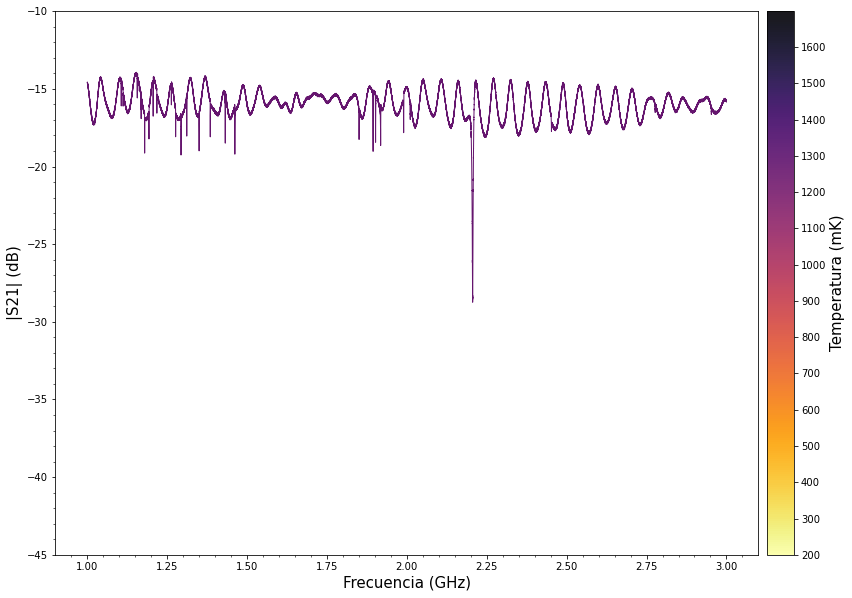

1200 mk.csv


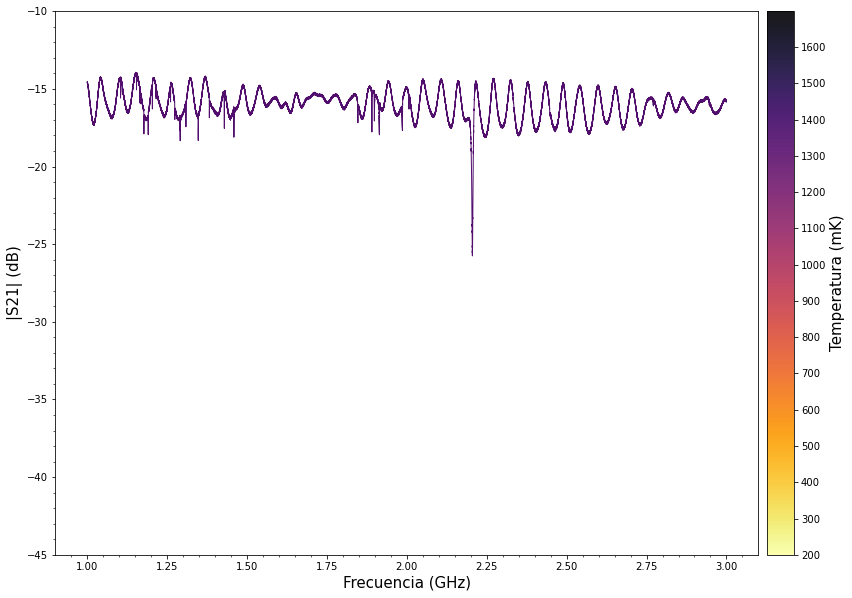

1300 mk.csv


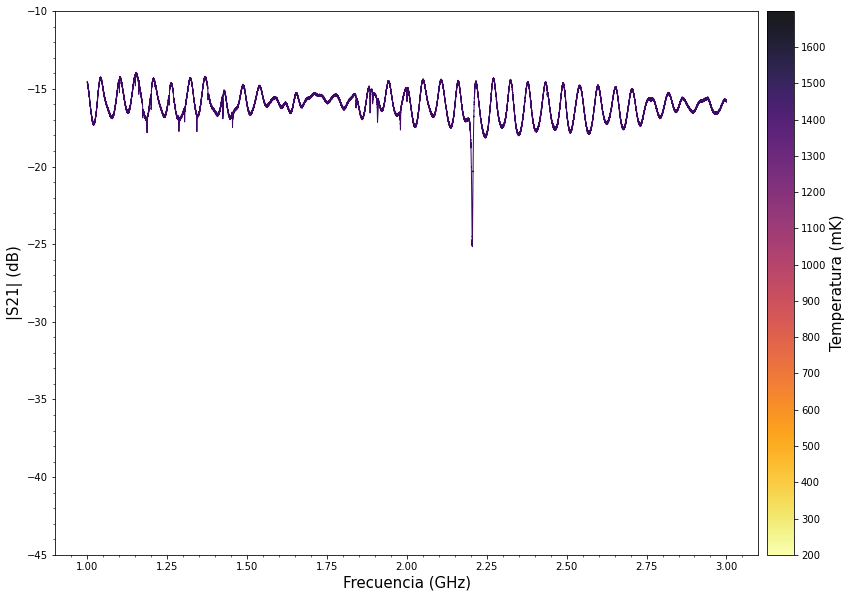

1400 mk.csv


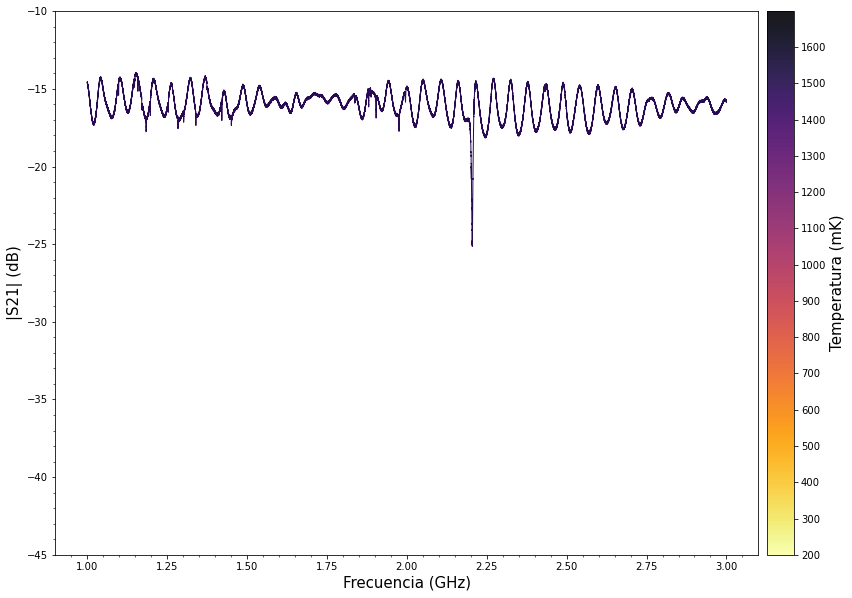

1500 mk.csv


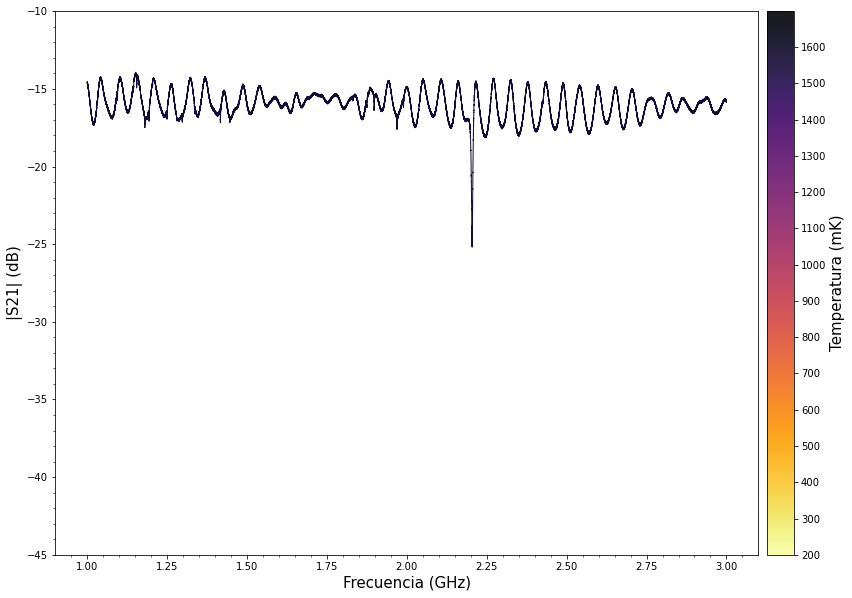

1600 mk.csv


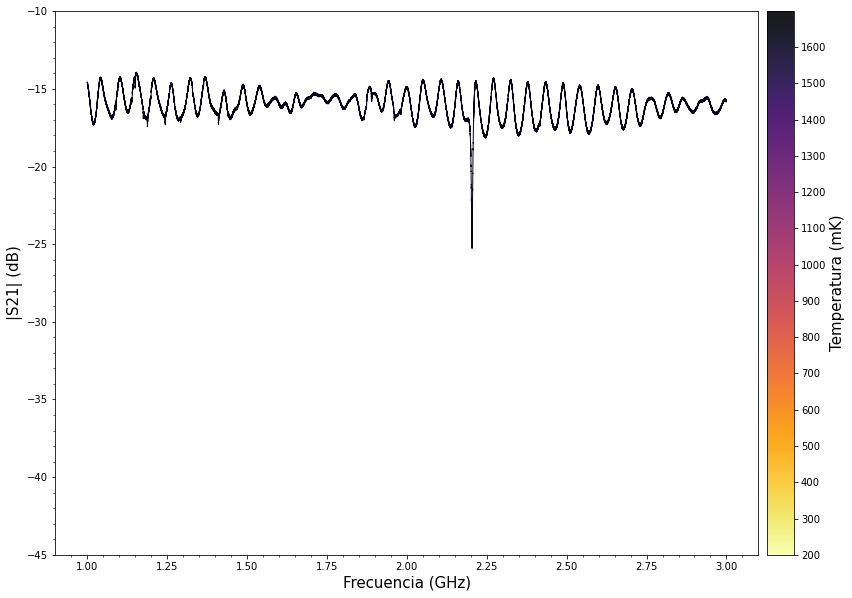

1700 mk.csv


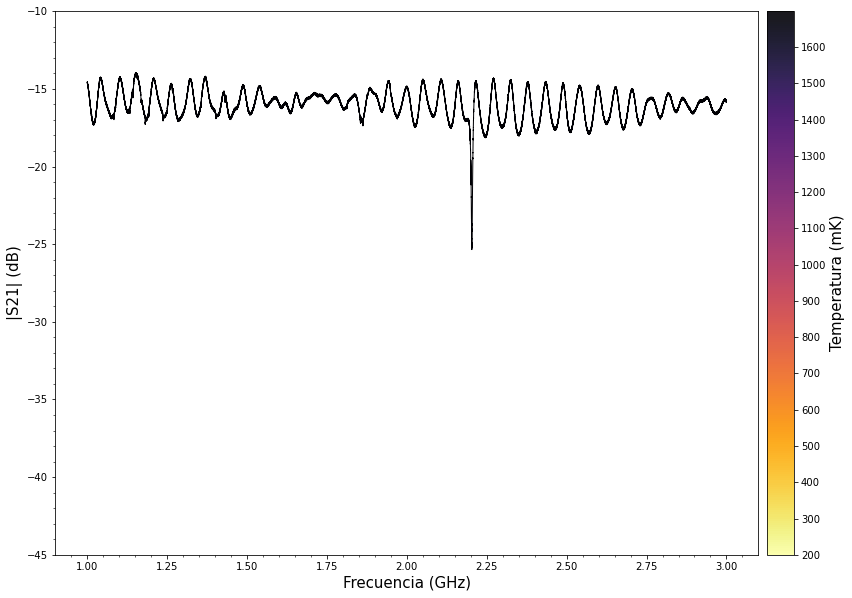

In [13]:

os.chdir(path+'\Datos\MKID\Temperatura\\24')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Temperatura\\24","*.csv")

norm = np.linspace(0,1,22)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("inferno_r")
colores = colormap(normdata(norm))


for i in range(len(files)):
    print(files[i])
    fig, ax = plt.subplots(figsize=(15, 10))
    file = files[i]
    df_file = pd.read_csv(file)
    freq = ((df_file.iloc[:,0])/10**9).tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()
    
    plt.plot(freq,db, alpha=1, linewidth=1, label=files[i], color=colores[i])

    x =np.arange(200,1700,1)
    plt.scatter(x,x, alpha=0.9, s=0, c=range(200,1700), cmap='inferno_r') 
    plt.colorbar(label='Temperatura (mK)',ticks=np.linspace(200, 1700, 16), pad=0.01) 
    plt.ylim(-45,-10) 
    
    plt.xlim(0.9,3.1)
    plt.minorticks_on()  
    plt.xlabel('Frecuencia (GHz)')
    plt.ylabel('|S21| (dB)')
    plt.show()

Resonancia 28

(2.41, 2.463)

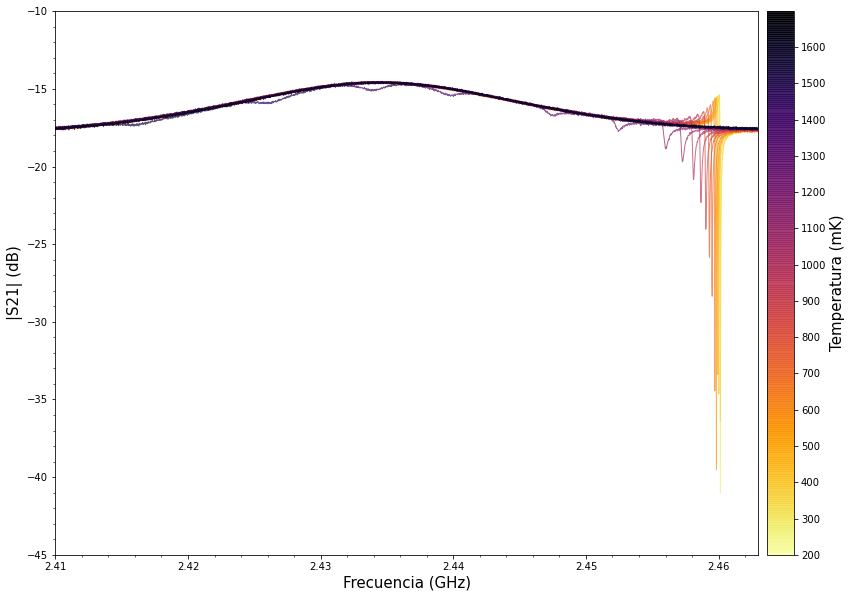

In [18]:
os.chdir(path+'\Datos\MKID\Temperatura\\24')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Temperatura\\24","*.csv")

norm = np.linspace(0,1,22)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("inferno_r")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(files)):
    file = files[i]
    df_file = pd.read_csv(file)
    freq = ((df_file.iloc[:,0])/10**9).tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()

    plt.plot(freq,db, alpha=0.7, linewidth=1, label=files[i], color=colores[i])
    
x =np.arange(200,1700,1)
plt.scatter(x,x, alpha=0.9, s=0, c=range(200,1700), cmap='inferno_r') 
plt.colorbar(label='Temperatura (mK)',ticks=np.linspace(200, 1700, 16), pad=0.01) 
plt.ylim(-45,-10) 

plt.minorticks_on()  
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('|S21| (dB)')
plt.xlim(2.41, 2.463)   

#import matplotlib.patches as patches
#ax.add_patch(patches.Rectangle(
#        (2.455, -42),
#        0.006,
#        28,
#        linewidth=1.5,
#        alpha = 0.6,
#        linestyle = 'dashed',
#        edgecolor = 'black',
#        facecolor = None,
#        fill=False ))

(2.455, 2.461)

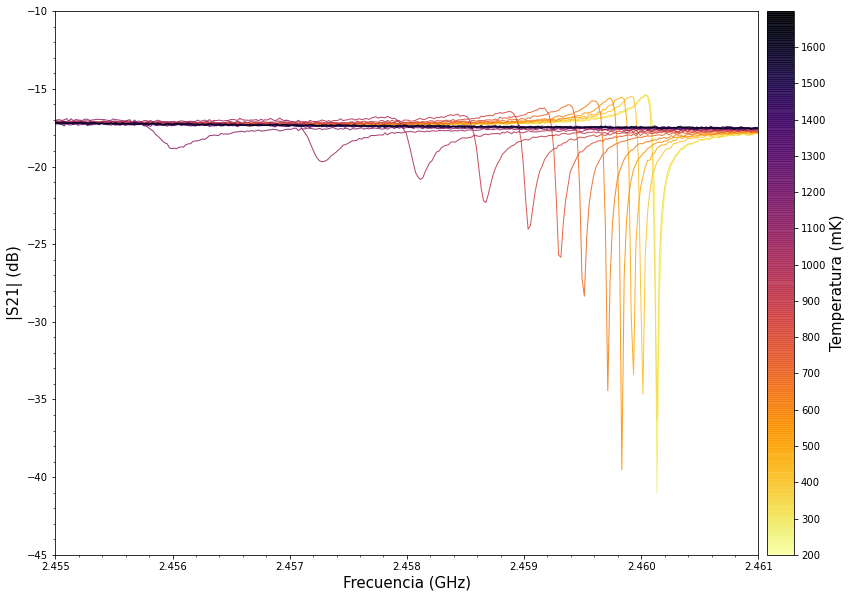

In [34]:
os.chdir(path+'\Datos\MKID\Temperatura\\24')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Temperatura\\24","*.csv")

norm = np.linspace(0,1,22)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("inferno_r")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(files)):
    file = files[i]
    df_file = pd.read_csv(file)
    freq = ((df_file.iloc[:,0])/10**9).tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()

    plt.plot(freq,db, alpha=0.9, linewidth=1, label=files[i], color=colores[i])

x =np.arange(200,1700,1)
plt.scatter(x,x, alpha=0.9, s=0, c=range(200,1700), cmap='inferno_r') 
plt.colorbar(label='Temperatura (mK)',ticks=np.linspace(200, 1700, 16), pad=0.01) 
plt.ylim(-45,-10) 

plt.minorticks_on()  
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('|S21| (dB)')
plt.xlim(2.455, 2.461)   

### NO

Variación de la frecuencia de resonancia con la temperatura, para picos 28 y 21, que se pueda comparar

Text(0.5, 1.0, 'Resonancia 21')

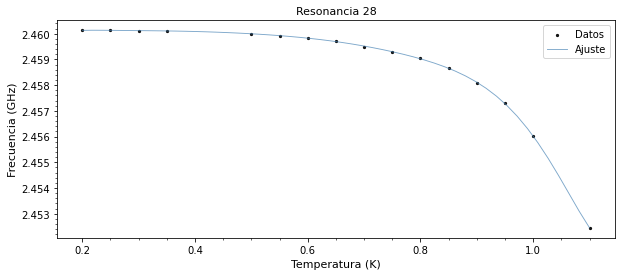

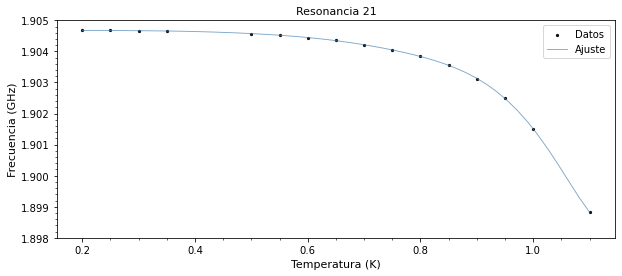

In [68]:
frec28 = np.array([2.460133,2.460133,2.460124,2.460110,2.460002,2.459923,2.459830,2.459711,2.459503,2.459302,2.459041,2.458654,2.458101,2.457292,2.456014,2.452450])
frec21 = np.array([1.904674,1.904674,1.904668,1.904657,1.904576,1.904516,1.904448,1.904357,1.904202,1.904047,1.903847,1.903550,1.903125,1.902491,1.901506,1.898823])
temp = np.array([0.200,0.250,0.300,0.350,0.500,0.550,0.600,0.650,0.700,0.750,0.800,0.850,0.900,0.950,1.000, 1.100])

plt.rcParams.update({'axes.labelsize': 11, 'axes.titlesize': 11, 
              'legend.fontsize':10, 'font.family': ['sans-serif'] })

def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results, degree


###  Res 28
model28 = np.poly1d(np.polyfit(temp, frec28, 9))
polyline = np.linspace(0.2, 1.1, 50)

fig, ax = plt.subplots(figsize=(10, 4))
plt.scatter(temp, frec28, alpha=0.9, s=5, color='black', label='Datos')
plt.plot(polyline, model28(polyline),alpha=0.7, linewidth=0.9, color='steelblue', label='Ajuste')
plt.legend()
plt.minorticks_on()  
plt.ylabel('Frecuencia (GHz)')
plt.xlabel('Temperatura (K)')   
plt.title('Resonancia 28')

###  Res 21
model21 = np.poly1d(np.polyfit(temp, frec21, 9))
polyline = np.linspace(0.2, 1.1, 50)

fig, ax = plt.subplots(figsize=(10, 4))
plt.scatter(temp, frec21, alpha=0.9, s=5, color='black', label='Datos')
plt.plot(polyline, model21(polyline), alpha=0.7, linewidth=0.9, color='steelblue', label='Ajuste')
plt.legend()
plt.minorticks_on()  
plt.ylabel('Frecuencia (GHz)')
plt.xlabel('Temperatura (K)')   
plt.ylim(1.898,1.905)
plt.title('Resonancia 21')

Variación de la amplitud con la temperatura, para picos 28 y 21, que se pueda comparar

Text(0.5, 0, 'Temperatura (K)')

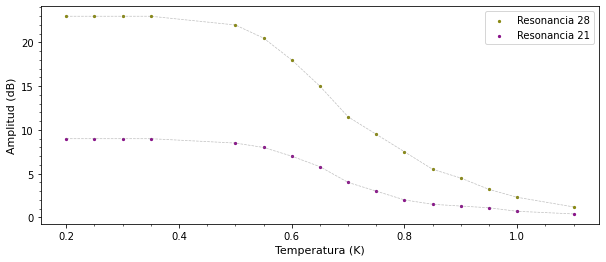

In [5]:
ampl28 = np.array([23.0,23.0,23.0,23.0,22.0,20.5,18.0,15.0,11.5,9.5,7.5,5.5,4.5,3.2,2.3,1.2])
ampl21 = np.array([9.0,9.0,9.0,9.0,8.5,8.0,7.0,5.8,4.0,3.0,2.0,1.5,1.3,1.1,0.7,0.4])
temp = np.array([0.200,0.250,0.300,0.350,0.500,0.550,0.600,0.650,0.700,0.750,0.800,0.850,0.900,0.950,1.000, 1.100])
delta_temp = np.delete(np.array([temp[i]-temp[i-1] for i in range(len(temp))]),0)

plt.rcParams.update({'axes.labelsize': 11, 'axes.titlesize': 11, 
              'legend.fontsize':10, 'font.family': ['sans-serif'] })


fig, ax = plt.subplots(figsize=(10, 4))

plt.scatter(temp, ampl28, alpha=0.9, s=5, color='olive', label='Resonancia 28')
plt.plot(temp, ampl28, alpha=0.5, linewidth=0.7, color='grey', linestyle='dashed')
plt.scatter(temp, ampl21, alpha=0.9, s=5, color='purple', label='Resonancia 21')
plt.plot(temp, ampl21, alpha=0.5, linewidth=0.7, color='grey', linestyle='dashed')

plt.minorticks_on()  
plt.legend()
plt.ylabel('Amplitud (dB)')
plt.xlabel('Temperatura (K)')  

## GIFs

In [3]:
import imageio
import re

def gif(name,time):
    # Ubicación de la base de datos
    path = 'C:/Users/saruk/Desktop/frames/frames pot'
    archivos = sorted(os.listdir(path))
    r = re.compile(r"(\d+)")  
    archivos.sort(key=lambda x: int(r.search(x).group(1)))
    img_array = []

    #Leer todos los archivos formato imagen desde path
    for x in range(0, len(archivos)):
        nomArchivo = archivos[x]
        dirArchivo = path +'/%s'%nomArchivo
    
        #Asignar a variable leer_imagen, el nombre de cada imagen
        leer_imagen = imageio.imread(dirArchivo)
    
        # añadir imágenes al arreglo img_array
        img_array.append(leer_imagen)
    
    #Guardar Gif
    imageio.mimwrite('C:/Users/saruk/Desktop/gifs' + '/%s.gif'%name, img_array, 'GIF', duration=time)
    return()

name = 'video'
time = 0.2
gif(name,time)

()